0.5360081366652724 0.8442128152478039


c:\users\daniel\pycharmprojects\eng1116-computacao-quantica\env\lib\site-packages\qiskit\visualization\bloch.py:397: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  self.axes = Axes3D(self.fig, azim=self.view[0], elev=self.view[1])
c:\users\daniel\pycharmprojects\eng1116-computacao-quantica\env\lib\site-packages\qiskit\visualization\bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


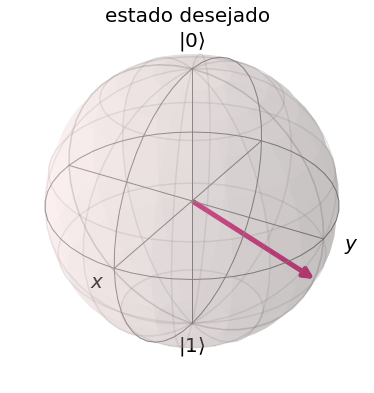

In [9]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_bloch_multivector, plot_histogram, plot_bloch_vector
from math import sqrt, pi, acos, asin

mat = 1910462

a = 10/3
b = 21/4
norma = sqrt(a**2 + b**2)

novo_a = a/norma
novo_b = b/norma
print(novo_a, novo_b)

# vetor desejado = 0.53600 |0) + 0.8442e^(i*2pi*(3/11)) |1)
# para valores esfericos:
# r = 1 (como qualquer qibit)
# theta = 2 * acos(0.53600)
# phi = 6/11 - 0 = 6/11pi

r = 1
theta = 2 * acos(novo_a)
phi = 2 * pi * 3 / 11

estado_desejado = [r, theta, phi]  # em esferico
plot_bloch_vector(estado_desejado, title="estado desejado", coord_type='spherical')

c:\users\daniel\pycharmprojects\eng1116-computacao-quantica\env\lib\site-packages\qiskit\visualization\bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


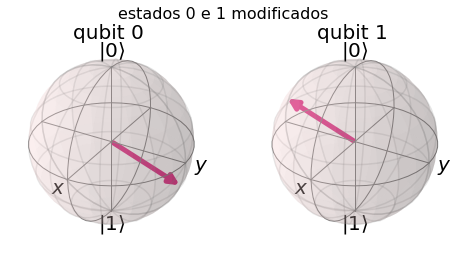

In [10]:
simulator = Aer.get_backend('statevector_simulator')

qc = QuantumCircuit(2, 2)
qc.ry(theta, 0)     # rotaciona no eixo X pelo angulo theta
qc.rz(phi, 0)       # rotaciona no eixo Z pelo angulo phi

# fazendo o segundo qibit
qc.x(1)             # estado |1)
qc.ry(theta, 1)
qc.rz(phi, 1)

# qc.draw()
result = execute(qc, simulator).result()
statevector = result.get_statevector()
plot_bloch_multivector(statevector, title="estados 0 e 1 modificados")

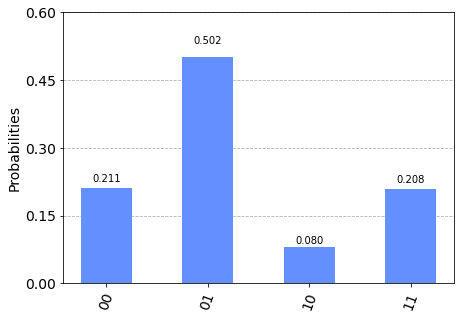

In [11]:
qc.measure([0,1], [0,1])
backend = Aer.get_backend('qasm_simulator')
result2 = execute(qc, backend, shots=10000).result()
counts = result2.get_counts()
from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)